<html>
    <head>
    <link rel="stylesheet"
	  href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css"
	  integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263XmFcJlSAwiGgFAW/dAiS6JXm"
	  crossorigin="anonymous">
    <link href="css/notebook.css" rel="stylesheet">
    <link href="css/main.css" rel="stylesheet">
  </head>
  
<div class="alert alert-info">
   <strong>T10 Digital</strong> Analisando dataset para campanha de marketing
</div>
<p class="text-justify">Projeto desenvolvido por: cassio.reis@engenharia.ufjf.br - Aluno do curso de mestrado em Ciência da Computação UFJF e aluno de pós graduação em Big Data e Data Science pela PUC Minas.</p>
<ul class="list-group">
  <a href="#projeto"> <li class="list-group-item"> <i class="fa fa-bullseye" aria-hidden="true"></i>  Expectivas do projeto 
</li> </a>
  <a href="#analise">  <li class="list-group-item"><i class="fa fa-search" aria-hidden="true"></i>
Análise do dataset</li></a>
  <a href="#insights"> <li class="list-group-item"><i class="fa fa-lightbulb-o" aria-hidden="true"></i>
Análise exploratóra dos dados e Insights</li></a>
  <a href="#modelo"> <li class="list-group-item"><i class="fa fa-cog" aria-hidden="true"></i>
Modelo</li></a>
  <a href="#bi"> <li class="list-group-item"><i class="fa fa-briefcase" aria-hidden="true"></i>
Business Intelligence</li></a>

</ul>


</html>

<a id="projeto">    </a>
<h3>
  Expectativa do projeto
    
  <small class="text-muted">“Sem dados você é apenas mais uma pessoa com uma opinião.” >/small>
</h3>

   <p class="text-justify"> Principal expectativa desse projeto é atender a necessidade da T10 em fornecer uma análise criteriosa sobre o dataset da campanha de Marketing, nosso objetivo é predizer o comportamento dos usuários baseado nos históricos de interação, além disso, é importante para o business que possamos fornecer KPI's de desenvolvimento para atingir a marca de maior conversão dos Leads..</p>

In [1]:
#Bibliotecas do projeto
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

In [2]:
#IMPORTANDO DATASET
df = pd.read_csv('data/campaigns.csv')
df.head()

Unnamed: 0  age           job  marital  education default  balance housing  \
0           0   58    management  married   tertiary      no     2143     yes   
1           1   44    technician   single  secondary      no       29     yes   
2           2   33  entrepreneur  married  secondary      no        2     yes   
3           3   47   blue-collar  married    unknown      no     1506     yes   
4           4   33       unknown   single    unknown      no        1      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no

<a id="analise">    <a>
<h3>
  Análise do dataset
  <small class="text-muted">Entendimento das variáveis de negócio</small>
</h3>



   <p class="text-justify"> Para a análise de cada variável iremos utilizar a biblioteca Profile Report do Python, essa ferramenta nos trás um "raio x" de todas as variáveis do dataset.</p>

In [3]:
#GERANDO RELATORIO DE ANALISE DE DADOS
profile = ProfileReport(df, title = 'Análise das variáveis', explorative=True)
profile


  
<div class="alert alert-danger">
   <strong>Education</strong> 4.1% dos dados não foram respondidos
</div>
<div class="alert alert-danger">
   <strong>Balance</strong> Coluna com outliers e valores máximos e mínimos bem expressivos.
    
</div>
<div class="alert alert-danger">
   <strong>Previous</strong> 81,8% dos valores são zeros.
    
</div>





<a id="insights">    <a>
<h3>
  Insights e Análise exploratória dos dados
  <small class="text-muted">O que podemos concluir ?</small>
</h3>

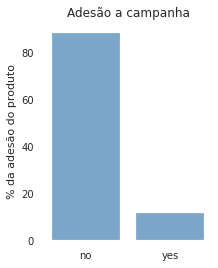

Não aderiram: 88.24%
Aderiram: 11.76%


In [4]:
#PLOTANDO VARIÁVEL DE INTERESSE
a = df.groupby("y")["y"].count()*100/df.y.count()
x = a.index
y = a

fig= plt.figure(figsize=(3,4))
ax = plt.bar(x, y,color = 'steelblue',alpha=0.7,label = ["1","2"])
plt.title("Adesão a campanha")
plt.ylabel('% da adesão do produto')

plt.show()


#
print("Não aderiram: {0:.2f}%".format(y[0]))
print("Aderiram: {0:.2f}%".format(y[1]))

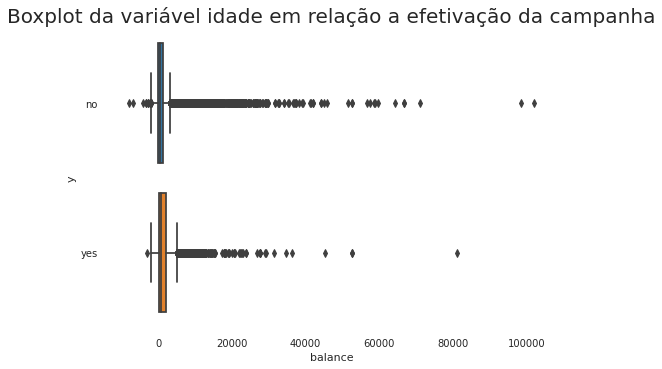

In [5]:
#PLOTANDO BOX DA VARIÁVEL BALANCE (ATENÇÃO AOS OUTLIERS)
ax = sns.boxplot(y = df.y , x ="balance" , data = df  )
plt.title("Boxplot da variável idade em relação a efetivação da campanha", size = 20)
plt.show()

In [6]:
#COUNTPLOT - PARA ENTENDER AS VARIÁVEIS

def bar_order(paramater, titulo ):
    plt.figure(figsize=(10,5))
    order_by = df[df.y == 'yes'][paramater].value_counts().index
    chart = sns.countplot(x = paramater, hue = 'y', data=df, order = order_by,palette="Blues")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title(titulo)
    plt.show()


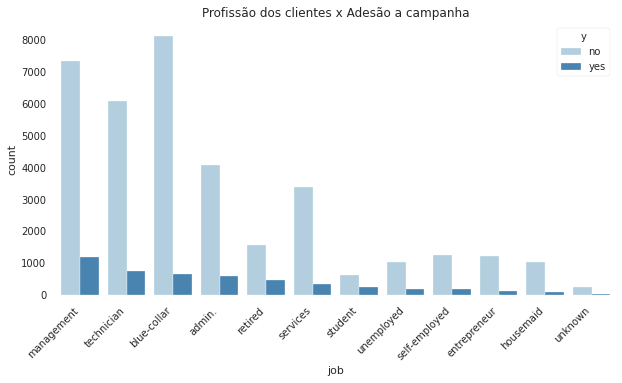

In [7]:
bar_order("job", "Profissão dos clientes x Adesão a campanha")

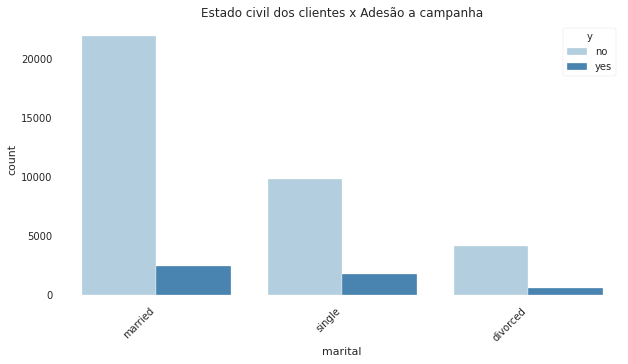

In [8]:
bar_order("marital", "Estado civil dos clientes x Adesão a campanha")

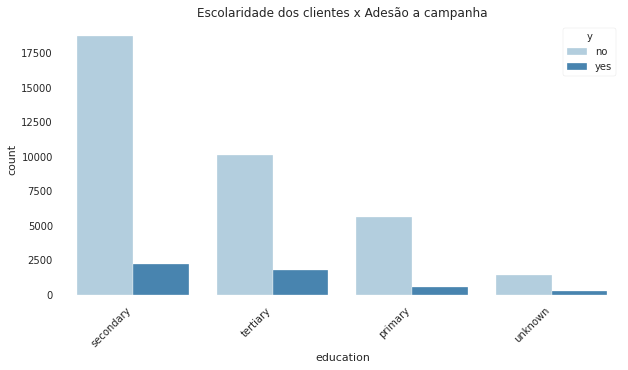

In [9]:
bar_order("education", "Escolaridade dos clientes x Adesão a campanha")

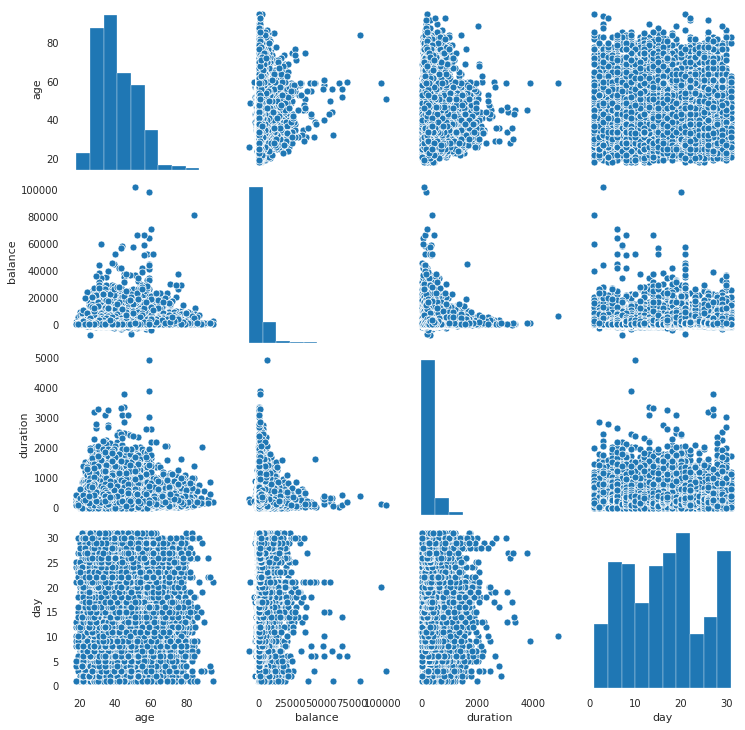

In [10]:
#BUSCANDO CORRELAÇÕES
sns.pairplot(df[['age','balance','duration','day','y']])

In [11]:
#PRE-PROCESSAMENTO
Lib_map = {'yes' : 1, 'no' : 0}
columns = [ 'default','housing','loan','y']
for c in columns:
    df[c] = df[c].map(Lib_map)
df = pd.get_dummies(df, columns=['job','marital',  'education','default','housing','loan','contact','month','poutcome'])
df.head()

Unnamed: 0  age  balance  day  duration  campaign  pdays  previous  y  \
0           0   58     2143    5       261         1     -1         0  0   
1           1   44       29    5       151         1     -1         0  0   
2           2   33        2    5        76         1     -1         0  0   
3           3   47     1506    5        92         1     -1         0  0   
4           4   33        1    5       198         1     -1         0  0   

   job_admin.  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
0           0  ...          0          0          1          0          0   
1           0  ...          0          0          1          0          0   
2           0  ...          0          0          1          0          0   
3           0  ...          0          0          1          0          0   
4           0  ...          0          0          1          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               0                 0   
1          0                 0               0                 0   
2          0                 0               0                 0   
3          0                 0               0                 0   
4          0                 0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 53 columns]

In [12]:
#NORMALIZAÇÃO DE DADOS
df['duration'] = df.duration.apply(lambda x: (x - df.duration.min())/(df.duration.max() - df.duration.min()))
df['balance'] = df.balance.apply(lambda x: (x - df.balance.min())/(df.balance.max() - df.balance.min()))



In [13]:
## OUTILERS DA VARIÁVEL BALANCE
# a variável balance possui 75% dos dados abaixo de 0.08. Encontrei no data set menos de 1% dos dados estão acima do valor de 0.20 que representa 
_mean = df.balance.mean()  
_std = df.balance.std()
_median = df.balance.median()

print("Média: {0:.2f}".format(_mean))
print("STD: {0:.2f}".format(_std) )
print("Médiana: {0:.2f}".format(_median))

print("Quantidade de valores acima de 3 desvios padrões: {}".format(df['balance'][df.balance >_mean + 3*_std  ].count()))
print("Representa {0:.2f}% dos dados da coluna 'balance'".format(df['balance'][df.balance >_mean + 3*_std  ].count()*100/df.shape[0]) )


print("Preenchendo outliers com a mediana dos dados da coluna balance...")
df.balance = df.balance.apply(lambda x: _median if x >_mean + 3*_std else x)


Média: 0.09
STD: 0.03
Médiana: 0.08
Quantidade de valores acima de 3 desvios padrões: 666
Representa 1.64% dos dados da coluna 'balance'
Preenchendo outliers com a mediana dos dados da coluna balance...


In [14]:
## OUTILERS DA VARIÁVEL DURATION
_mean = df.duration.mean()  
_std = df.duration.std()
_median = df.duration.median()

print("Média: {0:.2f}".format(_mean))
print("STD: {0:.2f}".format(_std) )
print("Médiana: {0:.2f}".format(_median))

print("Quantidade de valores acima de 4 desvios padrões: {}".format(df['duration'][df.duration >_mean + 4*_std  ].count()))
print("Representa {0:.2f}% dos dados da coluna 'balance'".format(df['duration'][df.duration >_mean + 4*_std  ].count()*100/df.shape[0]) )


print("Preenchendo outliers com a mediana dos dados da coluna balance...")
df.duration = df.duration.apply(lambda x: _median if x >_mean + 4*_std else x)

Média: 0.05
STD: 0.05
Médiana: 0.04
Quantidade de valores acima de 4 desvios padrões: 388
Representa 0.95% dos dados da coluna 'balance'
Preenchendo outliers com a mediana dos dados da coluna balance...


<a id="modelo">    <a>
<h3>
  Modelos
  <small class="text-muted">Regressão Logística e ExtraTreesClassifier</small>
</h3>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics


atributos = ['age',  'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']

# separar variáveis entre X e y
X = df[atributos]
y = df['y']


In [16]:
#REALIZANDO O BALANCEAMENTO DO DATA SET UTILIZANDO A BILBIOTECA SMOTE
from imblearn.over_sampling import SMOTE 
sample = SMOTE(random_state=0)
X_smote ,y_smote = sample.fit_sample(X, y)


#SPLIT DO DATASET
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X_smote, y_smote , test_size = 0.3, random_state = 42)



In [17]:
model_res = LogisticRegression()

#TREINO DO MODELO
model_res.fit(X_treino, Y_treino)
 
# PREVISÕES
y_pred_res = model_res.predict(X_teste)


# PRINT RELATÓRIO DE CLASSIFICAÇÃO
print("Relatório de Classificação:\n", classification_report(Y_teste, y_pred_res, digits=4))
 
# PRINT ACURÁCIA
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_teste, y_pred_res)))
 
# PRINT ÁREA SOB A CURVA
print("AUC: {:.4f}\n".format(roc_auc_score(Y_teste, y_pred_res)))


#PRINT MATRIZ DE CONFUSÃO
print("Matriz de Confusão")
print("{0}".format(metrics.confusion_matrix(Y_teste, y_pred_res, labels = [1, 0])))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8671    0.9340    0.8993     10810
           1     0.9279    0.8558    0.8904     10732

    accuracy                         0.8950     21542
   macro avg     0.8975    0.8949    0.8948     21542
weighted avg     0.8974    0.8950    0.8948     21542

Acurácia: 0.8950

AUC: 0.8949

Matriz de Confusão
[[ 9184  1548]
 [  714 10096]]


[[ 9184  1548]
 [  714 10096]]


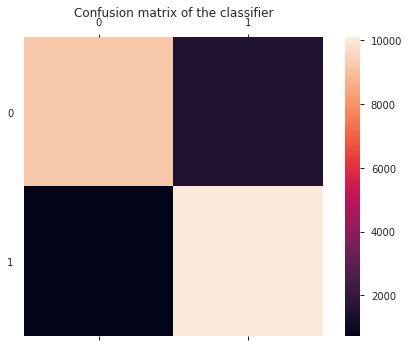

In [18]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(Y_teste, y_pred_res, labels = [1, 0])
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.show()

### Treinando outro modelo


[0.04201883 0.04254321 0.18062374 0.0280199  0.0112421  0.00689206
 0.01408454 0.02786974 0.00625989 0.00577762 0.01509373 0.00508381
 0.00780417 0.01340912 0.00343666 0.01842252 0.00652304 0.00129321
 0.0174434  0.02499509 0.0216593  0.01759774 0.02195166 0.01937325
 0.00915455 0.00188966 0.00120653 0.0270595  0.06013917 0.0141416
 0.02581145 0.01308479 0.00971486 0.05776322 0.01040655 0.0332252
 0.00163634 0.01308796 0.01116635 0.02808222 0.01030408 0.00222384
 0.02596303 0.01987533 0.00407473 0.00302947 0.01485303 0.00700728
 0.01397752 0.02170338]


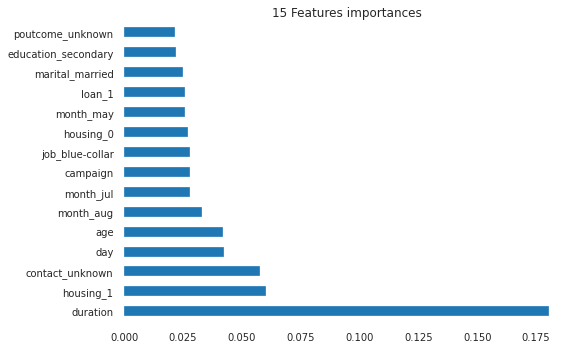

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_treino, Y_treino)

#FEATURE IMPORTANCE
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("15 Features importances")
plt.show()

 <p class="text-justify"> Duração é uma variável de extrema importância para o modelo, entedemos que essa feature deve virar também um kpi</p>

In [20]:
 
# PREVISÕES
y_pred_res = model.predict(X_teste)

    

# PRINT RELATÓRIO DE CLASSIFICAÇÃO
print("Relatório de Classificação:\n", classification_report(Y_teste, y_pred_res, digits=4))
 
# PRINT ACURÁCIA
print("Acurácia: {:.4f}\n".format(accuracy_score(Y_teste, y_pred_res)))
 
# PRINT ÁREA SOB A CURVA
print("AUC: {:.4f}\n".format(roc_auc_score(Y_teste, y_pred_res)))


#PRINT MATRIZ DE CONFUSÃO
print("Matriz de Confusão")
print("{0}".format(metrics.confusion_matrix(Y_teste, y_pred_res, labels = [1, 0])))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9291    0.9549    0.9418     10810
           1     0.9532    0.9266    0.9397     10732

    accuracy                         0.9408     21542
   macro avg     0.9411    0.9407    0.9407     21542
weighted avg     0.9411    0.9408    0.9408     21542

Acurácia: 0.9408

AUC: 0.9407

Matriz de Confusão
[[ 9944   788]
 [  488 10322]]


 <p class="text-justify"> Com relação aos modelos utilizado no trabalho a implantação do Extra Trees Classifier gerou uma Principal expectativa desse projeto é atender a necessidade da T10 em fornecer uma análise criteriosa sobre o dataset da campanha de Marketing, nosso objetivo é predizer o comportamento dos usuários baseado nos históricos de interação, além disso, é importante para o business que possamos fornecer KPI's de desenvolvimento para atingir a marca de maior conversão dos Leads..</p>

<a id="bi">    <a>
<h3>
  Business Intelligence
  <small class="text-muted">Sugestão para as equipes de marketing</small>
</h3>

 <p class="text-justify"> Para orientar a gestão de Marketing criamos um dash de business intelligence com alguns kpi's relevantes:
Abaixo temos as imagens com cada kpi e em anexo o projeto.</p>
<ul class="list-group">
  <a href="monitoramento.png"> <li class="list-group-item">  KPI Monitoramento da duração da chamada 
</li> </a>
  <a href="cargos.png">  <li class="list-group-item">
KPI - Conversão por profissão</li></a>
  <a href="civil.png"> <li class="list-group-item">
KPI - Monitoramento da campanha e Estado Civil</li></a>
  